<a href="https://colab.research.google.com/github/harshad-leo/CE888/blob/main/Lab8/Exercise_3_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
keras.__version__


'2.4.3'

In [ ]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We create a tokenizer, configured to only take into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)

# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [ ]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

Using word-embeddings 

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### Training the model with Embedding and SimpleRNN layers

In [ ]:
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras import models

model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 81s 492ms/step - loss: 0.6567 - acc: 0.5892 - val_loss: 0.4418 - val_acc: 0.8162
Epoch 2/10
157/157 [==============================] - 78s 494ms/step - loss: 0.3799 - acc: 0.8445 - val_loss: 0.3948 - val_acc: 0.8288
Epoch 3/10
157/157 [==============================] - 77s 494ms/step - loss: 0.2796 - acc: 0.8952 - val_loss: 

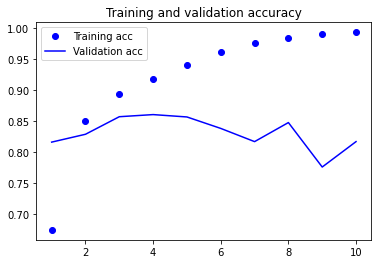

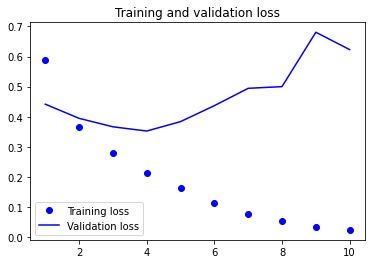

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Training the model with Embedding and SimpleRNN layers

In [ ]:
from keras.layers import LSTM

model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 44s 98ms/step - loss: 0.5922 - acc: 0.6752 - val_loss: 0.3760 - val_acc: 0.8484
Epoch 2/10
157/157 [==============================] - 15s 96ms/step - loss: 0.3010 - acc: 0.8827 - val_loss: 0.3061 - val_acc: 0.8808
Epoch 3/10
157/157 [==============================] - 15s 94ms/step - loss: 0.2194 - acc: 0.9185 - val_loss: 0.3046 - val_acc: 0.8698
Epoch 4/10
157/157 [==============================] - 15s 94ms/step - loss: 0.1928 - acc: 0.9287 - val_loss: 0.2852 - val_acc: 0.8912
Epoch 5/10
157/157 [==============================] - 15s 95ms/step - loss: 0.1625 - acc: 0.9415 - val_loss: 0.3747 - val_acc: 0.8696
Epoch 6/10
157/157 [==============================] - 15s 94ms/step - loss: 0.1496 - acc: 0.9489 - val_loss: 0.2996 - val_acc: 0.8772
Epoch 7/10
157/157 [==============================] - 15s 94ms/step - loss: 0.1296 - acc: 0.9571 - val_loss: 0.3197 - val_acc: 0.8810
Epoch 8/10
157/157 [==============================] - 15s 95ms

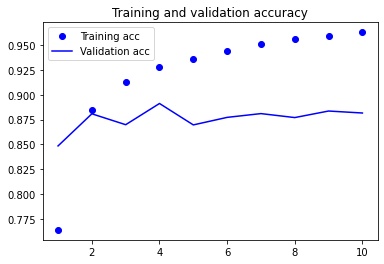

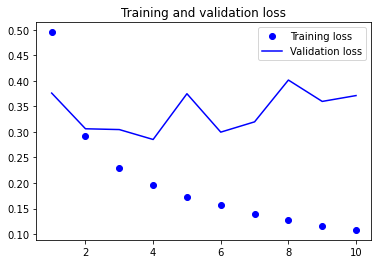

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Task 3: 

Please consider this Time Series Prediction with LSTM Recurrent Neural Networks. We can see that the LSTM model in the code below has an average error of about 23 passengers (in thousands) on the training dataset, and about 53 passengers (in thousands) on the test dataset. Not that bad. Can you please improve the performance?

#### Dataset Discription
The problem we are going to look at in this post is the International Airline Passengers prediction problem.
This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.



In [ ]:
import numpy
import math
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
df_data = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = df_data.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
datasets = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(datasets) * 0.67)
test_size = len(datasets) - train_size
train, test = datasets[0:train_size,:], datasets[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [ ]:
#task code
import numpy
import math
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
df_data = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = df_data.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


Epoch 1/50
94/94 - 2s - loss: 0.0388
Epoch 2/50
94/94 - 0s - loss: 0.0181
Epoch 3/50
94/94 - 0s - loss: 0.0135
Epoch 4/50
94/94 - 0s - loss: 0.0125
Epoch 5/50
94/94 - 0s - loss: 0.0115
Epoch 6/50
94/94 - 0s - loss: 0.0105
Epoch 7/50
94/94 - 0s - loss: 0.0097
Epoch 8/50
94/94 - 0s - loss: 0.0088
Epoch 9/50
94/94 - 0s - loss: 0.0079
Epoch 10/50
94/94 - 0s - loss: 0.0069
Epoch 11/50
94/94 - 0s - loss: 0.0062
Epoch 12/50
94/94 - 0s - loss: 0.0055
Epoch 13/50
94/94 - 0s - loss: 0.0048
Epoch 14/50
94/94 - 0s - loss: 0.0042
Epoch 15/50
94/94 - 0s - loss: 0.0037
Epoch 16/50
94/94 - 0s - loss: 0.0033
Epoch 17/50
94/94 - 0s - loss: 0.0029
Epoch 18/50
94/94 - 0s - loss: 0.0026
Epoch 19/50
94/94 - 0s - loss: 0.0025
Epoch 20/50
94/94 - 0s - loss: 0.0023
Epoch 21/50
94/94 - 0s - loss: 0.0022
Epoch 22/50
94/94 - 0s - loss: 0.0022
Epoch 23/50
94/94 - 0s - loss: 0.0021
Epoch 24/50
94/94 - 0s - loss: 0.0021
Epoch 25/50
94/94 - 0s - loss: 0.0021
Epoch 26/50
94/94 - 0s - loss: 0.0020
Epoch 27/50
94/94 - 0

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


Train Score: 22.98 RMSE
Test Score: 48.07 RMSE


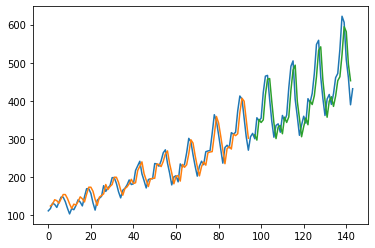

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()